# Review 1

## Problem Statement & Societal Impact

Developing a book recommendation system aims to address the challenge of assisting users in discovering books that align with their preferences, interests, and reading habits. The system leverages user data, such as past book ratings, demographic information, and book metadata to provide personalized recommendations. The primary goal is to enhance user satisfaction by offering relevant and engaging book suggestions, ultimately leading to increased user engagement, retention, and potentially, book sales.

### The possible impact of such a system includes but is not limited to:
1. Enhanced Access to Diverse Literature
2. Fostering Reading Culture
3. Supporting Independent Authors and Publishers
4. Empowering Users with Information
5. Reducing Information Overload

## Abstract

This project investigates the effectiveness of collaborative filtering in recommending books to users. We propose a recommender system that analyzes user-item interactions, specifically focusing on book ratings provided by users. The dataset employed incorporates various user attributes (user ID, location, age) alongside detailed book information (ISBN, title, author, publication year, publisher) and visual elements (image URLs).

The core recommendation engine utilizes collaborative filtering techniques to identify users with similar reading preferences. By analyzing past rating behavior, the system calculates user similarities and leverages these connections to recommend books enjoyed by similar users. This approach aims to address the cold-start problem and cater to users with limited reading history.

The project evaluates the performance of the chosen collaborative filtering algorithm, assessing its ability to generate relevant and personalized book recommendations. The findings will contribute to the development of more effective book recommendation systems, enhancing user experience and potentially fostering a deeper engagement with literature.

## Selection of Dataset

This dataset is from [Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset). It comprises three different datasets- Users, Ratings, & Books. The three datasets have been merged along the ISBN and User ID columns.

* Users:
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.


* Books:
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.


* Ratings:
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

## Exploratory Data Analysis

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

import os, sys
import re

### Reading in the data

In [2]:
books = pd.read_csv('datasets/Books.csv')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [4]:
users = pd.read_csv('datasets/Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
ratings = pd.read_csv('datasets/Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Changing Column Names and Viewing Shape

In [8]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


### Dropping image URL columns

In [9]:
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)

books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

### Describing year of publication

In [10]:
books.yearOfPublication.describe()

count     271360
unique    202   
top       2002  
freq      13903 
Name: yearOfPublication, dtype: int64

### Data Cleaning

In [11]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [12]:
books.loc[books.ISBN == '0789466953','yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953','bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','bookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','bookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


In [13]:
books.loc[books.yearOfPublication == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [14]:
books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


In [15]:
books.yearOfPublication=pd.to_numeric(books.yearOfPublication, errors='coerce')

print(sorted(books['yearOfPublication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [16]:
books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication == 0),'yearOfPublication'] = np.NAN

In [17]:
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace=True)

In [18]:
books.yearOfPublication.isnull().sum()

0

In [19]:
books.yearOfPublication=pd.to_numeric(books.yearOfPublication, errors='coerce')

print(sorted(books['yearOfPublication'].unique()))

[1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0]


In [20]:
books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [25]:
books.loc[(books.ISBN == '193169656X'),'publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'publisher'] = 'other'

In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


<AxesSubplot: >

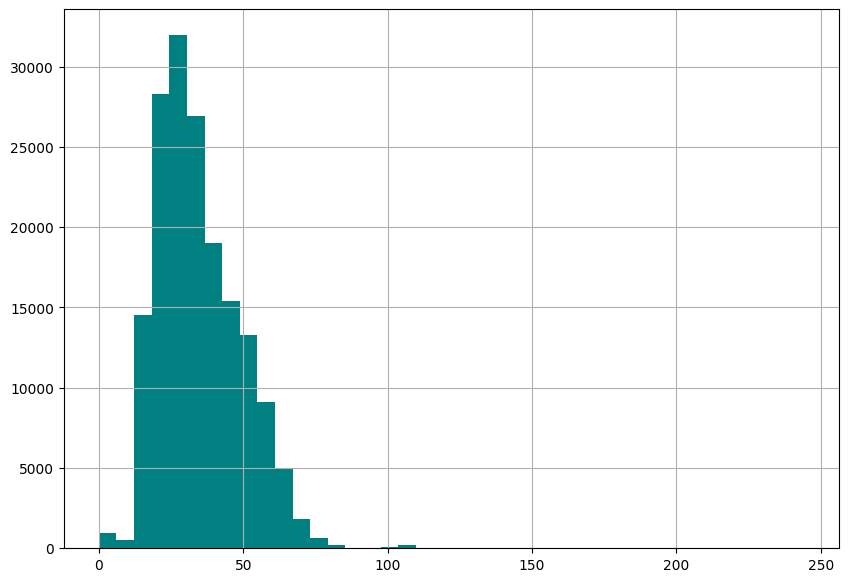

In [27]:
plt.figure(figsize=(10, 7))
users.Age.hist(bins=40, color='teal')

In [29]:
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

users.Age = users.Age.fillna(users.Age.mean())

<AxesSubplot: >

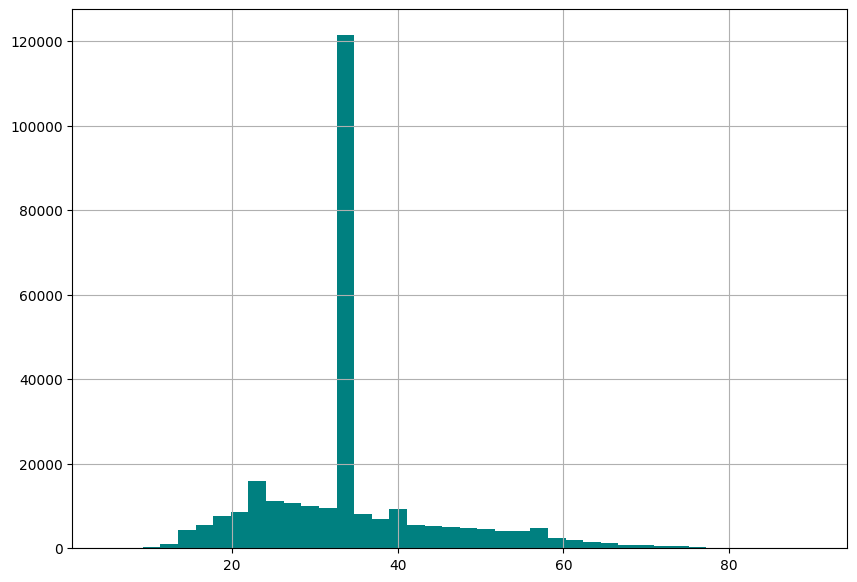

In [31]:
plt.figure(figsize=(10, 7))
users.Age.hist(bins=40, color='teal')

In [32]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",34.72384
1,2,"stockton, california, usa",18.00000
2,3,"moscow, yukon territory, russia",34.72384
3,4,"porto, v.n.gaia, portugal",17.00000
4,5,"farnborough, hants, united kingdom",34.72384
...,...,...,...
278853,278854,"portland, oregon, usa",34.72384
278854,278855,"tacoma, washington, united kingdom",50.00000
278855,278856,"brampton, ontario, canada",34.72384
278856,278857,"knoxville, tennessee, usa",34.72384


In [33]:
users['City'] = users['Location'].str.split(',').apply(lambda x: x[0])
users['Country'] = users['Location'].str.split(',').apply(lambda x: x[-1])

In [34]:
users

,User-ID,Location,Age,City,Country
0,1,"nyc, new york, usa",34.72384,nyc,usa
1,2,"stockton, california, usa",18.00000,stockton,usa
2,3,"moscow, yukon territory, russia",34.72384,moscow,russia
3,4,"porto, v.n.gaia, portugal",17.00000,porto,portugal
4,5,"farnborough, hants, united kingdom",34.72384,farnborough,united kingdom
...,...,...,...,...,...
278853,278854,"portland, oregon, usa",34.72384,portland,usa
278854,278855,"tacoma, washington, united kingdom",50.00000,tacoma,united kingdom
278855,278856,"brampton, ontario, canada",34.72384,brampton,canada
278856,278857,"knoxville, tennessee, usa",34.72384,knoxville,usa


In [35]:
ratings.shape

(1149780, 3)

In [36]:
n_users = users.shape[0]
n_books = books.shape[0]
n_users * n_books

75670906880

In [37]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [38]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

ratings.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

In [39]:
ratings = ratings[ratings['User-ID'].isin(users['User-ID'])]

print(ratings.shape)
print(ratings_new.shape)

(1149780, 3)
(1031136, 3)


In [40]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [41]:
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

(1031136, 3)
(383842, 3)
(647294, 3)


<AxesSubplot: xlabel='Book-Rating', ylabel='count'>

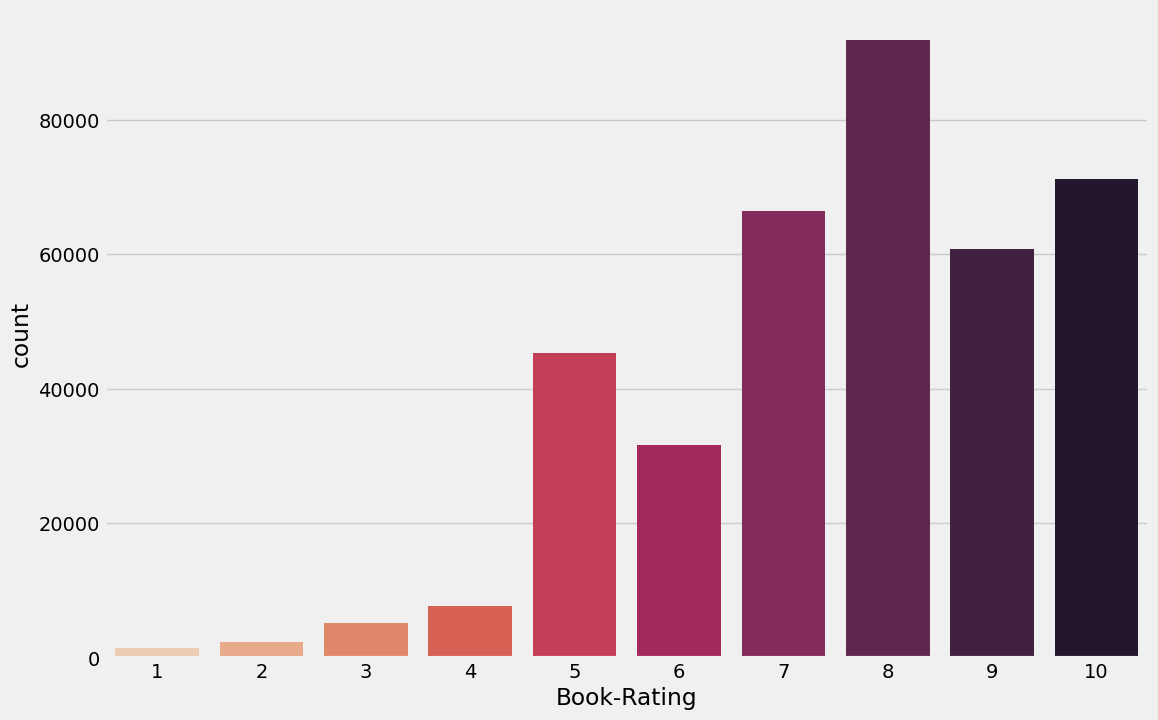

In [42]:
print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

### Top Popularity Based Recommendations

In [43]:
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['Book-Rating'].sum())
top10 = ratings_count.sort_values('Book-Rating', ascending = False).head(10)

top10.merge(books, left_index = True, right_on = 'ISBN')

,Book-Rating,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999.0,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998.0,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001.0,Pocket Star


In [44]:
users_exp_ratings = users[users['User-ID'].isin(ratings_explicit['User-ID'])]
users_imp_ratings = users[users['User-ID'].isin(ratings_implicit['User-ID'])]

In [45]:
print(users.shape)
print(users_exp_ratings.shape)
print(users_imp_ratings.shape)

(278858, 5)
(68091, 5)
(52451, 5)


In [47]:
books_ratings = books.merge(ratings, on = 'ISBN', how = 'outer')

In [48]:
books_ratings.head(15)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,41385.0,0.0
5,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544.0,8.0
6,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,85526.0,0.0
7,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,96054.0,0.0
8,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866.0,9.0
9,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629.0,9.0


In [49]:
books_ratings_users = books_ratings.merge(users, on = 'User-ID', indicator = True)

In [50]:
books_ratings_users.describe()

,yearOfPublication,User-ID,Book-Rating,Age
count,1.031136e+06,1.149780e+06,1.149780e+06,1.149780e+06
mean,1.995283e+03,1.403864e+05,2.866950e+00,3.628041e+01
std,7.309099e+00,8.056228e+04,3.854184e+00,1.029129e+01
min,1.376000e+03,2.000000e+00,0.000000e+00,5.000000e+00
25%,1.992000e+03,7.034500e+04,0.000000e+00,3.100000e+01
50%,1.997000e+03,1.410100e+05,0.000000e+00,3.472384e+01
75%,2.001000e+03,2.110280e+05,7.000000e+00,4.100000e+01
max,2.006000e+03,2.788540e+05,1.000000e+01,9.000000e+01


In [51]:
books_ratings_users.shape

(1149780, 12)

In [52]:
books_ratings_users.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'User-ID', 'Book-Rating', 'Location', 'Age', 'City', 'Country',
       '_merge'],
      dtype='object')

In [53]:
books_ratings_users = books_ratings_users.drop(columns =['_merge'])

In [54]:
books_ratings_users.isnull().sum()

ISBN                 0     
bookTitle            118644
bookAuthor           118645
yearOfPublication    118644
publisher            118644
User-ID              0     
Book-Rating          0     
Location             0     
Age                  0     
City                 0     
Country              0     
dtype: int64

In [55]:
df_dups = books_ratings_users[books_ratings_users.duplicated()]
df_dups.shape

(0, 11)

In [59]:
books_ratings_users[['bookTitle','bookAuthor', 'publisher' ]] = books_ratings_users[['bookTitle','bookAuthor', 'publisher' ]].fillna('Unknown')

In [60]:
books_ratings_users.tail()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country
1149775,8886661975,Unknown,Unknown,NaN,Unknown,276448.0,10.0,"torre del greco, campania, italy",34.72384,torre del greco,italy
1149776,7222025634,Unknown,Unknown,NaN,Unknown,276638.0,10.0,"shanghai, n/a, china",32.00000,shanghai,china
1149777,0533233661,Unknown,Unknown,NaN,Unknown,276663.0,5.0,"santiago de compostela, galicia, spain",20.00000,santiago de compostela,spain
1149778,3423120754,Unknown,Unknown,NaN,Unknown,276668.0,8.0,"mülheim an der ruhr, nordrhein-westfalen, germany",34.72384,mülheim an der ruhr,germany
1149779,05162443314,Unknown,Unknown,NaN,Unknown,276723.0,8.0,"san antonio, texas, usa",12.00000,san antonio,usa


In [61]:
explicit = books_ratings_users[books_ratings_users['Book-Rating'] != 0]
implicit = books_ratings_users[books_ratings_users['Book-Rating'] == 0]

In [62]:
explicit

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34.72384,timmins,canada
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8.0,5.0,"timmins, ontario, canada",34.72384,timmins,canada
12,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8.0,5.0,"timmins, ontario, canada",34.72384,timmins,canada
13,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8.0,5.0,"timmins, ontario, canada",34.72384,timmins,canada
15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8.0,6.0,"timmins, ontario, canada",34.72384,timmins,canada
...,...,...,...,...,...,...,...,...,...,...,...
1149775,8886661975,Unknown,Unknown,NaN,Unknown,276448.0,10.0,"torre del greco, campania, italy",34.72384,torre del greco,italy
1149776,7222025634,Unknown,Unknown,NaN,Unknown,276638.0,10.0,"shanghai, n/a, china",32.00000,shanghai,china
1149777,0533233661,Unknown,Unknown,NaN,Unknown,276663.0,5.0,"santiago de compostela, galicia, spain",20.00000,santiago de compostela,spain
1149778,3423120754,Unknown,Unknown,NaN,Unknown,276668.0,8.0,"mülheim an der ruhr, nordrhein-westfalen, germany",34.72384,mülheim an der ruhr,germany


In [63]:
explicit.isnull().sum()

ISBN                 0    
bookTitle            0    
bookAuthor           0    
yearOfPublication    49829
publisher            0    
User-ID              0    
Book-Rating          0    
Location             0    
Age                  0    
City                 0    
Country              0    
dtype: int64

In [64]:
explicit['yearOfPublication'].value_counts(dropna = False)

NaN       49829
2002.0    37986
2001.0    32331
2003.0    29166
1999.0    29100
          ...  
1806.0    1    
1934.0    1    
1378.0    1    
1904.0    1    
1376.0    1    
Name: yearOfPublication, Length: 96, dtype: int64

In [65]:
explicit.yearOfPublication = pd.to_numeric(explicit.yearOfPublication, errors='coerce')

print(sorted(explicit['yearOfPublication'].unique()))

[1920.0, 1930.0, 1953.0, 1955.0, 1957.0, 1958.0, 1959.0, 1960.0, 1963.0, 1964.0, 1965.0, 1966.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, nan, 1376.0, 1378.0, 1806.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1911.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1954.0, 1956.0, 1961.0, 1962.0, 1967.0, 1968.0, 1969.0, 2005.0, 2006.0]


In [66]:
explicit.yearOfPublication.fillna(round(explicit.yearOfPublication.mean()), inplace = True)

In [67]:
explicit.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
User-ID              0
Book-Rating          0
Location             0
Age                  0
City                 0
Country              0
dtype: int64

In [68]:
sub = explicit[['Age', 'Book-Rating', 'yearOfPublication']]

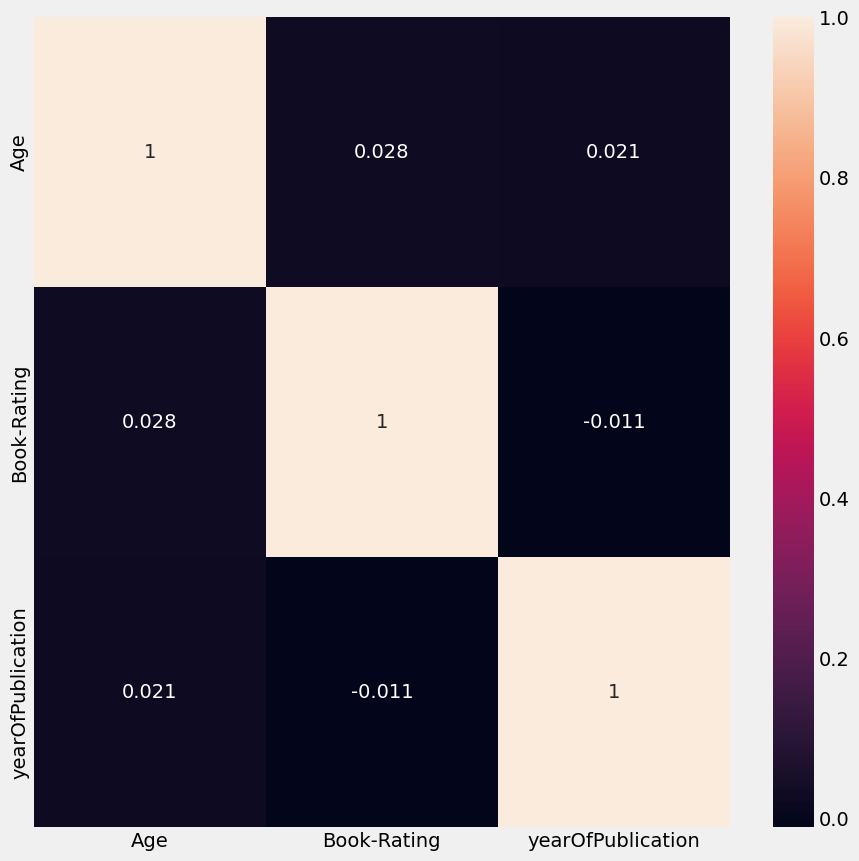

In [69]:
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

In [71]:
explicit.loc[(explicit['Age'] >= 5) & (explicit['Age'] <= 18), 'Age Group'] = '5-18 years old'
explicit.loc[(explicit['Age'] >= 19) & (explicit['Age'] <= 35), 'Age Group'] = '19-35 years old'
explicit.loc[(explicit['Age'] >= 36) & (explicit['Age'] <= 55), 'Age Group'] = '36-55 years old'
explicit.loc[(explicit['Age'] >= 56) & (explicit['Age'] <= 74), 'Age Group'] = '56-74 years old'
explicit.loc[(explicit['Age'] >= 75) & (explicit['Age'] <= 90), 'Age Group'] = '75-90 years old'

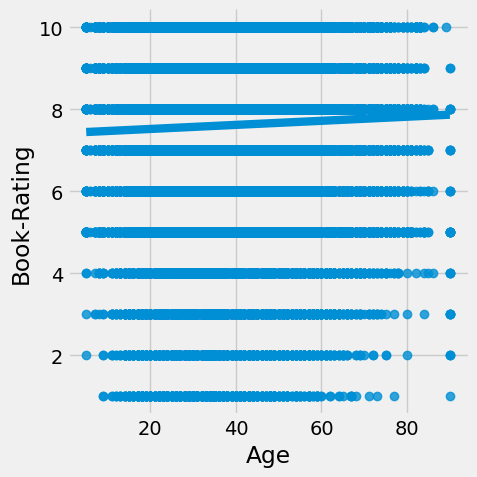

In [72]:
sns.lmplot(x = 'Age', y = 'Book-Rating', data = explicit)

In [73]:
sub_2 = sub[['Age', 'Book-Rating', 'yearOfPublication']]

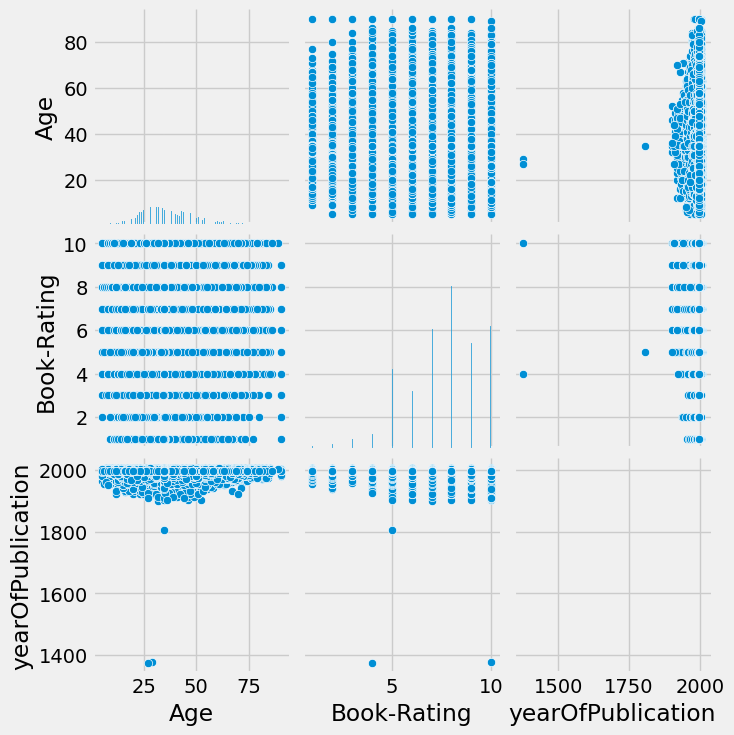

In [74]:
g = sns.pairplot(sub_2)

In [75]:
explicit.loc[(explicit['Book-Rating'] >= 1) & (explicit['Book-Rating'] <= 2), 'Rating category'] = 'Bad category'
explicit.loc[(explicit['Book-Rating'] >= 3) & (explicit['Book-Rating'] <= 4), 'Rating category'] = 'Neutral category'
explicit.loc[(explicit['Book-Rating'] >= 5) & (explicit['Book-Rating'] <= 6), 'Rating category'] = 'Middle category'
explicit.loc[(explicit['Book-Rating'] >= 7) & (explicit['Book-Rating'] <= 8), 'Rating category'] = 'Good category'
explicit.loc[explicit['Book-Rating'] >= 9, 'Rating category'] = 'Outstanding category'

In [76]:
explicit['Rating category'].value_counts(dropna = False)

Good category           180193
Outstanding category    146151
Middle category         87898 
Neutral category        14900 
Bad category            4529  
Name: Rating category, dtype: int64

In [77]:
explicit

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country,Age Group,Rating category
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34.72384,timmins,canada,19-35 years old,Middle category
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8.0,5.0,"timmins, ontario, canada",34.72384,timmins,canada,19-35 years old,Middle category
12,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8.0,5.0,"timmins, ontario, canada",34.72384,timmins,canada,19-35 years old,Middle category
13,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8.0,5.0,"timmins, ontario, canada",34.72384,timmins,canada,19-35 years old,Middle category
15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8.0,6.0,"timmins, ontario, canada",34.72384,timmins,canada,19-35 years old,Middle category
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149775,8886661975,Unknown,Unknown,1996.0,Unknown,276448.0,10.0,"torre del greco, campania, italy",34.72384,torre del greco,italy,19-35 years old,Outstanding category
1149776,7222025634,Unknown,Unknown,1996.0,Unknown,276638.0,10.0,"shanghai, n/a, china",32.00000,shanghai,china,19-35 years old,Outstanding category
1149777,0533233661,Unknown,Unknown,1996.0,Unknown,276663.0,5.0,"santiago de compostela, galicia, spain",20.00000,santiago de compostela,spain,19-35 years old,Middle category
1149778,3423120754,Unknown,Unknown,1996.0,Unknown,276668.0,8.0,"mülheim an der ruhr, nordrhein-westfalen, germany",34.72384,mülheim an der ruhr,germany,19-35 years old,Good category


In [78]:
print(sorted(explicit['Country'].unique()))

['', ' &#20013;&#22269;', ' \\"n/a\\""', ' \\n/a\\""', ' afghanistan', ' alachua', ' albania', ' alderney', ' algeria', ' america', ' andorra', ' angola', ' antarctica', ' antigua and barbuda', ' argentina', ' aroostook', ' aruba', ' australia', ' austria', ' austria"', ' autralia', ' az', ' azerbaijan', ' bahamas', ' bahrain', ' bangladesh', ' barbados', ' basilicata', ' belgium', ' belize', ' benin', ' berguedà', ' bermuda', ' bolivia', ' bosnia and herzegovina', ' brasil', ' brazil', ' brazil"', ' brunei', ' bulgaria', ' burma', ' c', ' c.a.', ' calabria', ' cambodia', ' camden', ' cameroon', ' canada', ' cananda', ' cape verde', ' caribbean sea', ' catalonia', ' catalunya', ' catalunya spain', ' cayman islands', ' channel islands', ' cherokee', ' chile', ' china', ' colombia', ' costa rica', ' costa rica"', ' croatia', ' croatia"', ' csa', ' cuba', ' cyprus', ' czech republic', ' denmark', ' denmark"', ' deutschland', ' disgruntled states of america', ' dominican republic', ' ecuad

In [79]:
def correct_country_name(country):
    country_lower = country.lower()

    au_patterns = [' australia', ' autralia']
    ag_patterns = [' antigua and barbuda']
    at_patterns = [' austria', ' austria"']
    az_patterns = [' az', ' azerbaijan']
    ba_patterns = [' bosnia and herzegovina']
    be_patterns = [' belgium', ' la belgique']
    br_patterns = [' brasil', ' brazil', ' brazil"']
    ca_patterns = [' canada', ' cananda']
    cn_patterns = [' china', ' la chine éternelle!', ' p.r.china']
    cr_patterns = [' costa rica', ' costa rica"']
    hr_patterns = [' croatia', ' croatia"']
    eu_patterns = [' europe']
    dk_patterns = [' denmark', ' denmark"']
    fi_patterns = [' finland', ' finland"']
    fr_patterns = [' france', ' france"', ' la france']
    de_patterns = [' deutschland', ' geermany', ' germany', ' germany"']
    gw_patterns = [' guinea-bissau']
    gr_patterns = [' greece', ' greece"']
    hu_patterns = [' hungary', ' hungary"']
    in_patterns = [' india', ' india"']
    ir_patterns = [' iran', ' iran"']
    ie_patterns = [' ireland', ' ireland"']
    il_patterns = [' israel', ' israel"']
    it_patterns = [' basilicata', ' calabria', ' ferrara', ' italia', ' italy', ' italy"', ' l`italia', ' lazio', ' lombardia']
    lu_patterns = [' luxembourg', ' luxembourg"']
    mm_patterns = [' burma']
    mx_patterns = [' mexico', ' mexico"']
    nl_patterns = [' nederlands', ' netherlands', ' netherlands"', ' the netherlands']
    nz_patterns = [' new zealand', ' new zealand"', ' nz']
    no_patterns = [' norway', ' norway"']
    pa_patterns = [' panama', ' republic of panama']
    ph_patterns = [' philippines', ' philippines"', ' phillipines']
    pt_patterns = [' portugal', ' portugal"']
    sh_patterns = [' st. helena']
    si_patterns = [' slovenia', ' slovenia"']
    es_patterns = [' berguedà', ' catalonia', ' catalunya', ' catalunya spain', ' espanha / galiza', ' espaã±a', ' españa', ' españa"', ' euskal herria', ' galiza', ' lleida', ' orense', ' spain', ' spain"']
    lk_patterns = [' sri lanka', ' sri lanka"']
    se_patterns = [' sweden', ' sweden"']
    ch_patterns = [' la suisse', ' switzerland', ' switzerland"']
    tr_patterns = [' turkey', ' turkey"']
    tt_patterns = [' tobago', ' trinidad and tobago']
    ua_patterns = [' ua', ' ukraine']
    ae_patterns = [' u.a.e', ' united arab emirates']
    uk_patterns = [' united kindgonm', ' alderney', ' camden', ' england', ' scotland', ' u.k.', ' united kingdom', ' united kingdom"', ' wales']
    us_patterns = [' alachua', ' america', ' aroostook', ' c.a.', ' cherokee', ' disgruntled states of america', ' fort bend', ' framingham', ' los estados unidos de norte america', ' maracopa', ' maricopa', ' ohio', ' orange co', ' richmond country', ' rutherford', ' saint loius', ' st.thomasi', ' u.s. of a.', ' u.s.a.', ' u.s.a>', ' u.s>', ' united sates', ' united staes', ' united state', ' united states', ' united states of america', ' us', ' usa', ' usa & canada', ' usa (currently living in england)', ' worcester', ' ysa']
    uv_patterns = [' u.s. virgin islands']
    uy_patterns = [' urugua', ' uruguay']
    yu_patterns = [' yugoslavia']

    unknown_patterns = [' &#20013;&#22269;', '', ' \\"n/a\\""', ' \\n/a\\""', ' c', ' caribbean sea', ' csa', ' everywhere and anywhere', ' far away...', ' here and there', ' k1c7b1', ' kern', ' lkjlj', ' morgan', ' n/a', ' n/a - on the road', ' pender', ' petrolwar nation', ' polk', ' quit', ' shelby', ' space', ' tdzimi', ' the world tomorrow', ' universe', ' van wert', ' x', '"', ' europe']
    
    patterns = {
        "Australia": au_patterns, "Antigua and Barbuda": ag_patterns, "Austria": at_patterns, "Azerbaijan": az_patterns, "Belgium": be_patterns,
        "Bosnia and Herzegovina": ba_patterns, "Brazil": br_patterns, "Canada": ca_patterns, "China": cn_patterns, "Costa Rica": cr_patterns,
        "Croatia": hr_patterns, "Denmark": dk_patterns, "Finland": fi_patterns, "France": fr_patterns,
        "Germany": de_patterns, "Guinea Bissau": gw_patterns, "Greece": gr_patterns, "Hungary": hu_patterns, "India": in_patterns,
        "Iran": ir_patterns, "Ireland": ie_patterns, "Israel": il_patterns, "Italy": it_patterns,
        "Luxembourg": lu_patterns, "Myanmar": mm_patterns, "Mexico": mx_patterns, "Netherlands": nl_patterns, "New Zealand": nz_patterns,
        "Norway": no_patterns, "Panama": pa_patterns, "Philippines": ph_patterns, "Portugal": pt_patterns,
        "Saint Helena": sh_patterns, "Slovenia": si_patterns, "Spain": es_patterns, "Sri Lanka": lk_patterns,
        "Sweden": se_patterns, "Switzerland": ch_patterns, "Turkey": tr_patterns, "Trinidad and Tobago": tt_patterns, "Ukraine": ua_patterns,
        "United Arab Emirates": ae_patterns, "United Kingdom": uk_patterns, "United States": us_patterns,
        "U.S. Virgin Islands": uv_patterns, "Uruguay": uy_patterns, "Serbia": yu_patterns, "Unknown": unknown_patterns
    }

    for country_name, pattern_list in patterns.items():
        if country_lower in pattern_list:
            return country_name

    return country.title()

explicit['Country'] = explicit['Country'].apply(correct_country_name)

explicit

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country,Age Group,Rating category
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34.72384,timmins,Canada,19-35 years old,Middle category
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8.0,5.0,"timmins, ontario, canada",34.72384,timmins,Canada,19-35 years old,Middle category
12,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8.0,5.0,"timmins, ontario, canada",34.72384,timmins,Canada,19-35 years old,Middle category
13,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8.0,5.0,"timmins, ontario, canada",34.72384,timmins,Canada,19-35 years old,Middle category
15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8.0,6.0,"timmins, ontario, canada",34.72384,timmins,Canada,19-35 years old,Middle category
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149775,8886661975,Unknown,Unknown,1996.0,Unknown,276448.0,10.0,"torre del greco, campania, italy",34.72384,torre del greco,Italy,19-35 years old,Outstanding category
1149776,7222025634,Unknown,Unknown,1996.0,Unknown,276638.0,10.0,"shanghai, n/a, china",32.00000,shanghai,China,19-35 years old,Outstanding category
1149777,0533233661,Unknown,Unknown,1996.0,Unknown,276663.0,5.0,"santiago de compostela, galicia, spain",20.00000,santiago de compostela,Spain,19-35 years old,Middle category
1149778,3423120754,Unknown,Unknown,1996.0,Unknown,276668.0,8.0,"mülheim an der ruhr, nordrhein-westfalen, germany",34.72384,mülheim an der ruhr,Germany,19-35 years old,Good category


In [80]:
print(sorted(explicit['Country'].unique()))

[' Afghanistan', ' Albania', ' Algeria', ' Andorra', ' Angola', ' Antarctica', ' Argentina', ' Aruba', ' Bahamas', ' Bahrain', ' Bangladesh', ' Barbados', ' Belize', ' Benin', ' Bermuda', ' Bolivia', ' Brunei', ' Bulgaria', ' Cambodia', ' Cameroon', ' Cape Verde', ' Cayman Islands', ' Channel Islands', ' Chile', ' Colombia', ' Cuba', ' Cyprus', ' Czech Republic', ' Dominican Republic', ' Ecuador', ' Egypt', ' El Salvador', ' Estonia', ' Fiji', ' Gabon', ' Ghana', ' Grenada', ' Guam', ' Guatemala', ' Guernsey', ' Guinea', ' Honduras', ' Hong Kong', ' Iceland', ' Indonesia', ' Jamaica', ' Japan', ' Jersey', ' Jordan', ' Kazakhstan', ' Kenya', ' Kosovo', ' Kuwait', ' Laos', ' Latvia', ' Lebanon', ' Libya', ' Lithuania', ' Macau', ' Macedonia', ' Madagascar', ' Malaysia', ' Malta', ' Mauritius', ' Moldova', ' Monaco', ' Mongolia', ' Morocco', ' Mozambique', ' Nepal', ' Netherlands Antilles', ' Nicaragua', ' Niger', ' Nigeria', ' Oman', ' Pakistan', ' Palau', ' Papua New Guinea', ' Paraguay

In [81]:
explicit['Country'] = explicit['Country'].str.lstrip()

In [82]:
explicit.loc[
    explicit['Country'].isin(['Antarctica']),
    'Continent'
] = 'Antarctica'

explicit.loc[
    explicit['Country'].isin(['Algeria', 'Angola', 'Benin', 'Cameroon', 'Cape Verde', \
                                      'Egypt', 'Gabon', 'Ghana', 'Guinea', 'Guinea Bissau', \
                                      'Kenya', 'Libya', 'Madagascar', 'Mauritius', 'Morocco', 'Mozambique', \
                                      'Niger', 'Nigeria', 'Saint Helena', 'South Africa', \
                                      'Tanzania', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']),
    'Continent'
] = 'Africa'

explicit.loc[
    explicit['Country'].isin(['Afghanistan', 'Bahrain', 'Bangladesh', 'Brunei', 'Myanmar', 'Cambodia', \
                                      'China', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Israel', 'Japan', \
                                      'Jordan', 'Kuwait', 'Laos', 'Lebanon', 'Macau', 'Malaysia', 'Mongolia', \
                                      'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Russia', \
                                      'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', \
                                      'Tajikistan', 'Thailand', 'Turkmenistan', 'United Arab Emirates', \
                                      'Uzbekistan', 'Vietnam', 'Yemen']),
    'Continent'
] = 'Asia'

explicit.loc[
    explicit['Country'].isin(['Albania', 'Andorra', 'Austria', 'Azerbaijan', 'Belgium', 'Bosnia and Herzegovina', \
                                      'Bulgaria', 'Channel Islands', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', \
                                      'Finland', 'France', 'Germany', 'Greece', 'Guernsey', 'Hungary', 'Iceland', 'Ireland', 'Italy', \
                                      'Jersey', 'Kazakhstan', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco', \
                                      'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', \
                                      'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom']),
    'Continent'
] = 'Europe'

explicit.loc[
    explicit['Country'].isin(['Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Canada', 'Cayman Islands', \
                                      'Cuba', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala', 'Grenada', 'Honduras', 'Jamaica', \
                                      'Mexico', 'Netherlands Antilles', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Lucia', \
                                      'Trinidad and Tobago', 'U.S. Virgin Islands', 'United States']),
    'Continent'
] = 'North America'

explicit.loc[
    explicit['Country'].isin(['Australia', 'Fiji', 'Guam', 'New Zealand','Palau', 'Papua New Guinea', \
                                      'Samoa', 'Tonga']),
    'Continent'
] = 'Oceania'

explicit.loc[
    explicit['Country'].isin(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', \
                                      'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']),
    'Continent'
] = 'South America'

explicit.loc[
    explicit['Country'].isin(['Unknown']),
    'Continent'
] = 'Unknown'

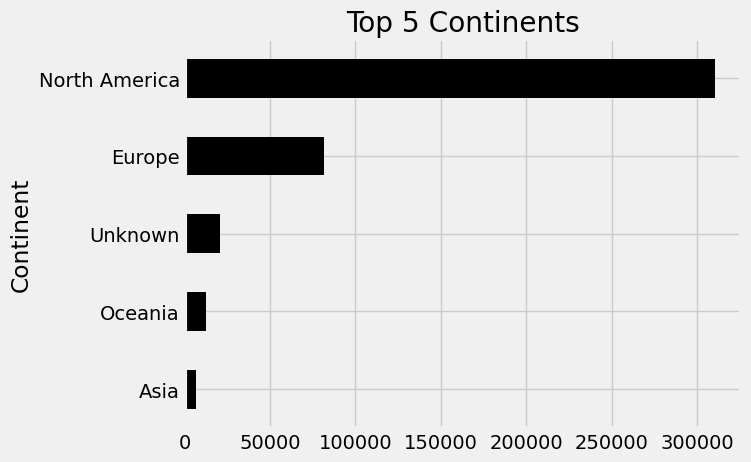

In [83]:
top_continent_barchart = explicit['Continent'].value_counts()[:5].sort_values(ascending = True).plot.barh(title = 'Top 5 Continents', ylabel='Continent', xlabel='', color ='black')

In [86]:
country_count = pd.DataFrame(explicit.groupby(['Country'])['Book-Rating'].max())
top10countries_highratings = country_count.sort_values('Book-Rating', ascending = False).head(10)

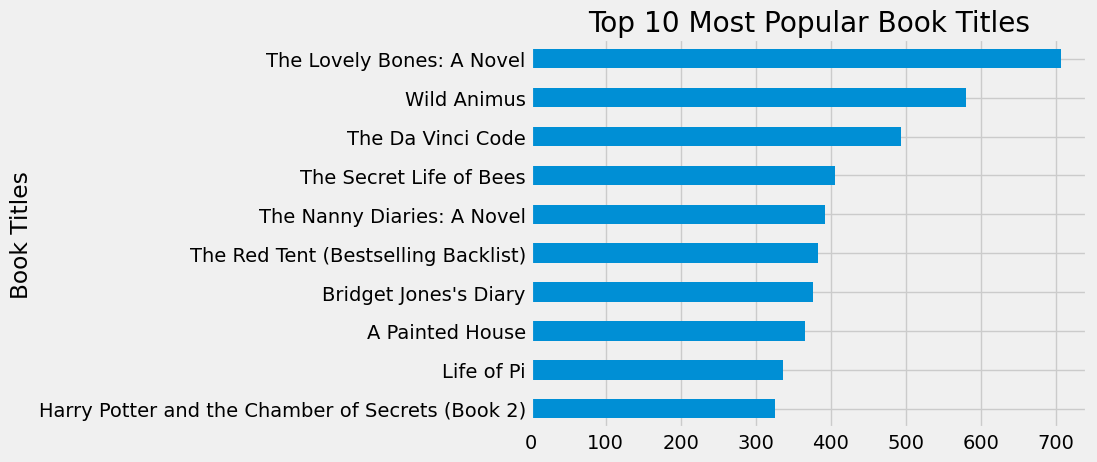

In [88]:
popular_titles_barchart = explicit['bookTitle'].value_counts()[1:11].sort_values(ascending = True).plot.barh(title = 'Top 10 Most Popular Book Titles', ylabel='Book Titles', xlabel='')

plt.show()

In [89]:
ratings_count = pd.DataFrame(explicit.groupby(['bookAuthor'])['Book-Rating'].sum())
top10authors = ratings_count.sort_values('Book-Rating', ascending = False).head(11)

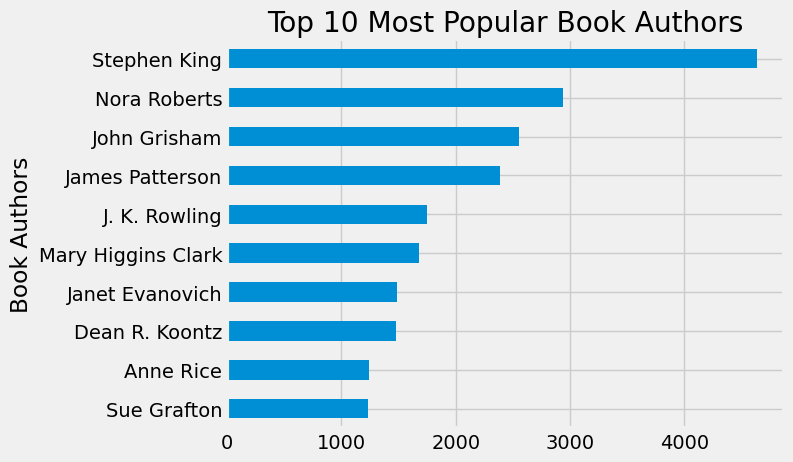

In [90]:
popular_authors_barchart = explicit['bookAuthor'].value_counts()[1:11].sort_values(ascending = True).plot.barh(title = 'Top 10 Most Popular Book Authors', ylabel='Book Authors', xlabel='')